In [158]:
import pandas as pd
location='/Users/mithleshpatel/anaconda2/zipzap/Data_File/Badoo senior data scientist test/'

In [159]:
# Import dataset
df = pd.read_csv(location+'paula_ratings.csv.bz2', parse_dates=['date_of_birth', 'date_of_registration'])

In [160]:
# Analyse dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 7 columns):
name                    100001 non-null object
date_of_birth           100001 non-null datetime64[ns]
date_of_registration    100001 non-null datetime64[ns]
job                     50587 non-null object
height                  100001 non-null int64
profile_popularity      100001 non-null int64
liked                   100001 non-null int64
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.3+ MB


In [161]:
# Checking sample data
df.head()

,name,date_of_birth,date_of_registration,job,height,profile_popularity,liked
0,Colton,1991-09-15,2017-09-16,author,179,0,1
1,Shaun,1993-01-11,2016-03-10,NaN,166,0,1
2,Emanuel,1995-01-04,2017-10-09,NaN,175,1,1
3,Demetrius,1992-06-06,2016-07-09,NaN,173,3,0
4,Dominick,1993-04-28,2017-03-10,air steward,177,4,1


In [162]:
# Sice dates may bot be a better choice as features, converting those to numeric values by subsctracting from current date
from datetime import datetime
now = datetime.now()
df['Age'] = (now - df['date_of_birth']).dt.days
df['Time_In_Badoo'] = (now - df['date_of_registration']).dt.days

In [163]:
# Check whether columns have been created in dataframe
df.head()

,name,date_of_birth,date_of_registration,job,height,profile_popularity,liked,Age,Time_In_Badoo
0,Colton,1991-09-15,2017-09-16,author,179,0,1,9622,124
1,Shaun,1993-01-11,2016-03-10,NaN,166,0,1,9138,679
2,Emanuel,1995-01-04,2017-10-09,NaN,175,1,1,8415,101
3,Demetrius,1992-06-06,2016-07-09,NaN,173,3,0,9357,558
4,Dominick,1993-04-28,2017-03-10,air steward,177,4,1,9031,314


In [164]:
# Thre seems some missing values filling by 0
df['job'] = df['job'].fillna(value=0)

In [165]:
# Job seems a good feature but needs to be converted into numbers, check how many distinct jobs DF has
jobs=df['job'].unique()

In [166]:
# Try analysing general behaviour of data
import seaborn as sns

In [167]:

import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('whitegrid')


In [168]:
import numpy as np
# Converting age into years from days
df['Age_Months'] = df['Age']/30
#sns.boxplot(x=df['liked'],y=df['Age'],data=df,whis=np.inf)
df['Age_Years'] = df['Age_Months']/12


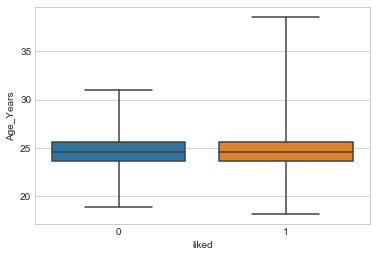

In [169]:
sns.boxplot(x=df['liked'],y=df['Age_Years'],data=df,whis=np.inf)
# It seems younger people mostly performed activity.

Text(0.5,1,u'By Age')

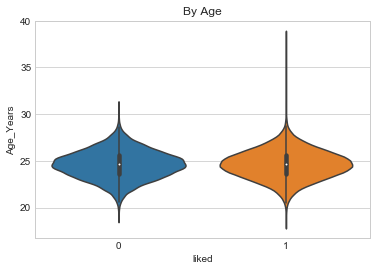

In [253]:
sns.violinplot(x=df['liked'],y=df['Age_Years'],data=df,whis=np.inf)
plt.title('By Age')

In [259]:
# remove outliers
df = df[(df['Age_Years'] <= 30) & (df['Age_Years'] >= 20)]
df.head()

,name,date_of_birth,date_of_registration,job,height,profile_popularity,liked,Age,Time_In_Badoo,Age_Months,Age_Years,job_ID
0,Colton,1991-09-15,2017-09-16,author,179,0,1,9622,124,320.733333,26.727778,9
1,Shaun,1993-01-11,2016-03-10,0,166,0,1,9138,679,304.600000,25.383333,0
2,Emanuel,1995-01-04,2017-10-09,0,175,1,1,8415,101,280.500000,23.375000,0
3,Demetrius,1992-06-06,2016-07-09,0,173,3,0,9357,558,311.900000,25.991667,0
4,Dominick,1993-04-28,2017-03-10,air steward,177,4,1,9031,314,301.033333,25.086111,5


Text(0.5,1,u'By Time In Badoo')

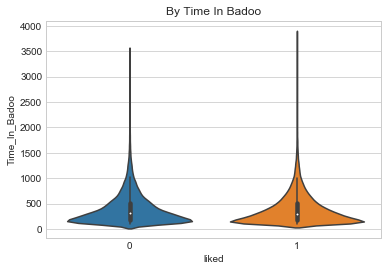

In [254]:
sns.violinplot(x=df['liked'],y=df['Time_In_Badoo'],data=df,whis=np.inf)
plt.title('By Time In Badoo')
# It seems people recently joined have performed most of the activity in rating or not rating Paula's profile 

In [261]:
# remove outliers
df = df[df['Time_In_Badoo'] <= 1500]
df.head()

,name,date_of_birth,date_of_registration,job,height,profile_popularity,liked,Age,Time_In_Badoo,Age_Months,Age_Years,job_ID
0,Colton,1991-09-15,2017-09-16,author,179,0,1,9622,124,320.733333,26.727778,9
1,Shaun,1993-01-11,2016-03-10,0,166,0,1,9138,679,304.600000,25.383333,0
2,Emanuel,1995-01-04,2017-10-09,0,175,1,1,8415,101,280.500000,23.375000,0
3,Demetrius,1992-06-06,2016-07-09,0,173,3,0,9357,558,311.900000,25.991667,0
4,Dominick,1993-04-28,2017-03-10,air steward,177,4,1,9031,314,301.033333,25.086111,5


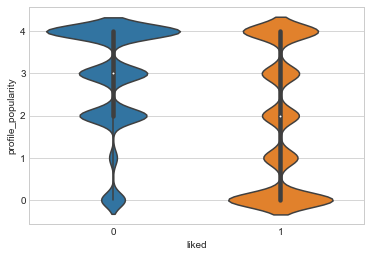

In [262]:
sns.violinplot(x=df['liked'],y=df['profile_popularity'],data=df,whis=np.inf)
# Here it can be seen that less popular people have liked Paula's profile and more polar people doesn't.

In [263]:
# creating integers to map jobs
job_id = []
job_names = []
for i, j in enumerate(jobs):
    job_id.append(i+1)
    job_names.append(j)


In [264]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from numpy import argmax

In [265]:
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(jobs)
job_ID = integer_encoded
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

inverted = label_encoder.inverse_transform([argmax(onehot_encoded[0, :])])
print(inverted)

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
['author']


In [266]:
# map jobs with numeric values and add in a dictionary
print jobs
print job_ID
map_jobs = dict(zip(jobs,job_ID))
df['job_ID']=df['job'].map(map_jobs)

['author' 0 'air steward' 'farmer' 'accountant' 'jeweler' 'vet' 'doctor'
 'sailor' 'shop assistant' 'TV cameraman' 'nurse' 'cook' 'actor'
 'career counselor' 'porter' 'computer programmer' 'lawyer' 'salesperson'
 'printer' 'lecturer' 'travel agent' 'painter' 'professional gambler'
 'dentist' 'TV presenter' 'chef' 'photographer' 'head teacher'
 'makeup artist' 'scientist' 'company director' 'politician' 'fishmonger'
 'film director' 'tailor' 'sign language Interpreter' 'receptionist'
 'animator' 'manager' 'puppeteer' 'butcher' 'economist' 'geologist'
 'fisherman' 'clerk' 'executive' 'journalist' 'teacher' 'surgeon'
 'decorator' 'juggler' 'electrician' 'singer' 'telephonist' 'web designer'
 'magician' 'engineer' 'garbage man' 'judge' 'library assistant'
 'assistant' 'solicitor' 'director' 'lexicographer' 'pilot' 'musician'
 'diplomat' 'civil servant' 'hairdresser' 'plumber' 'miner' 'trucker'
 'biologist' 'secretary' 'designer' 'writer' 'architect' 'translator'
 'waiter' 'baker' 'caretake

In [267]:
df.head()

,name,date_of_birth,date_of_registration,job,height,profile_popularity,liked,Age,Time_In_Badoo,Age_Months,Age_Years,job_ID
0,Colton,1991-09-15,2017-09-16,author,179,0,1,9622,124,320.733333,26.727778,9
1,Shaun,1993-01-11,2016-03-10,0,166,0,1,9138,679,304.600000,25.383333,0
2,Emanuel,1995-01-04,2017-10-09,0,175,1,1,8415,101,280.500000,23.375000,0
3,Demetrius,1992-06-06,2016-07-09,0,173,3,0,9357,558,311.900000,25.991667,0
4,Dominick,1993-04-28,2017-03-10,air steward,177,4,1,9031,314,301.033333,25.086111,5


In [268]:
# Creating DF which can be used in models
df_model = df[['height','profile_popularity','Age','Time_In_Badoo','job_ID','liked']]
df_model.head()

,height,profile_popularity,Age,Time_In_Badoo,job_ID,liked
0,179,0,9622,124,9,1
1,166,0,9138,679,0,1
2,175,1,8415,101,0,1
3,173,3,9357,558,0,0
4,177,4,9031,314,5,1


In [269]:
#Features
X_model = df_model.drop('liked',axis=1)
#Targets
Y_model = df_model.liked

In [270]:
from sklearn.cross_validation import train_test_split

In [271]:
X_train,X_test,Y_train,Y_test = train_test_split(X_model,Y_model,test_size=0.4,random_state=3)

In [272]:
# Using logistic regression because it outputs values between 0 and 1
from sklearn.linear_model import LogisticRegression

In [273]:
clf = LogisticRegression()

In [274]:
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [275]:
predicted = clf.predict(X_test)
expected = Y_test

In [276]:
from sklearn import metrics

In [277]:
print metrics.accuracy_score(predicted,expected)
Logistic_scrore = metrics.accuracy_score(predicted,expected)

0.798458817585


In [278]:
from sklearn.tree import DecisionTreeClassifier

In [279]:
DT_model = DecisionTreeClassifier()

In [280]:
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [281]:
predicted = DT_model.predict(X_test)
expected = Y_test
print metrics.accuracy_score(predicted,expected)
DT_Score = metrics.accuracy_score(predicted,expected)

0.837973724103


In [282]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100,random_state=0)

In [283]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [284]:
predicted = clf.predict(X_test)
expected = Y_test

In [285]:
print metrics.accuracy_score(predicted,expected)
RF_Score = metrics.accuracy_score(predicted,expected)

0.906063668519


In [286]:
import datetime
users_to_predict = pd.DataFrame([('Richard',
                                  datetime.date(1994,11,5),
                                  datetime.date(2017,10,16),
                                      'computer programmer',
                                      178,
                                      1),
                                     ('Thomas',
                                      datetime.date(1998, 11, 5),
                                      datetime.date(2017, 9, 3),
                                      'doctor',
                                      172,
                                      4),
], columns=('name',
            'date_of_birth',
            'date_of_registration',
            'job',
            'height',
            'profile_popularity'))

In [287]:
users_to_predict

,name,date_of_birth,date_of_registration,job,height,profile_popularity
0,Richard,1994-11-05,2017-10-16,computer programmer,178,1
1,Thomas,1998-11-05,2017-09-03,doctor,172,4


In [288]:
import datetime
now = datetime.date.today()
users_to_predict['Age'] = (now - users_to_predict['date_of_birth']).dt.days
users_to_predict['Time_In_Badoo'] = (now - users_to_predict['date_of_registration']).dt.days
users_to_predict['job_ID']=users_to_predict['job'].map(map_jobs)

In [289]:
users_to_predict.head()

,name,date_of_birth,date_of_registration,job,height,profile_popularity,Age,Time_In_Badoo,job_ID
0,Richard,1994-11-05,2017-10-16,computer programmer,178,1,8475,94,21
1,Thomas,1998-11-05,2017-09-03,doctor,172,4,7014,137,28


In [290]:
users_to_predict = users_to_predict[['height','profile_popularity','Age','Time_In_Badoo','job_ID']]

In [291]:
clf.predict(users_to_predict)
# It seems 1st user will like her profile whereas 2nd one won't.

array([1, 0])

In [292]:
# Print scores from various models
print "Logistic : %.2f%%" %(Logistic_scrore*100)
print "Decision Tree : %.2f%%" %(DT_Score*100)
print "Randomforest : %.2f%%" %(RF_Score*100)

Logistic : 79.85%
Decision Tree : 83.80%
Randomforest : 90.61%


In [293]:
#It seems random forest is providing better results and can be used in production.
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('logistic',LogisticRegression()),
    ('DT',DecisionTreeClassifier()),
    ('RF',RandomForestClassifier(n_estimators=100,random_state=0)),
])

TypeError: All intermediate steps should be transformers and implement fit and transform. 'LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)' (type <class 'sklearn.linear_model.logistic.LogisticRegression'>) doesn't